In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import datetime  
from datetime import date 
import calendar 

In [2]:
csv_file2 = "crash_data2.csv"
Crash_df = pd.read_csv(csv_file2)
Crash_df

,Unnamed: 0,ACC_ID,ROAD_NO,COMMON_ROAD_NAME,CWAY,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,ACCIDENT_TYPE,...,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED,CRASH_TIME_HRS,CRASH_TIME_MIN,CRASH_DAYWEEK,CRASH_TIMEDAY
0,0,10034076,1250106,Huntriss Rd,S,115.787126,-31.888018,09/06/2019,130.0,Intersection,...,0,0,0,0,1,0,1,30,Sunday,Night
1,1,10034083,1311665,Joondalup Dr,L,115.781050,-31.770677,09/06/2019,1345.0,Intersection,...,0,0,0,0,3,0,13,45,Sunday,Afternoon
2,2,10036078,1110006,Lord St,S,115.954109,-31.900235,09/06/2019,1230.0,Intersection,...,0,0,0,0,2,0,12,30,Sunday,Afternoon
3,3,10036129,1300280,Fitzgerald St,S,115.859176,-31.932468,09/06/2019,1115.0,Midblock,...,0,0,0,0,2,0,11,15,Sunday,Morning
4,4,10014546,1102151,Connolly Dr,L,115.711603,-31.651690,09/06/2019,1520.0,Intersection,...,0,0,0,0,1,0,15,20,Sunday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145119,145587,9828256,H013,Canning Hwy,L,115.808584,-32.032091,13/07/2018,2055.0,Intersection,...,0,0,0,0,2,0,20,55,Friday,Evening
145120,145588,9828289,H035,Charles St,L,115.852651,-31.940140,13/07/2018,1330.0,Intersection,...,0,0,0,0,2,0,13,30,Friday,Afternoon
145121,145589,9801828,1070031,Currie St,S,115.753142,-32.342408,13/07/2018,1947.0,Midblock,...,0,0,0,0,1,1,19,47,Friday,Evening
145122,145590,9830313,1251035,Herbert St,S,115.777739,-31.890679,13/07/2018,1035.0,Midblock,...,0,0,0,0,2,0,10,35,Friday,Morning


In [3]:
ML_data=Crash_df[['CRASH_TIME_HRS','CRASH_DAYWEEK','CRASH_DATE','ACC_ID']]
ML_data.CRASH_DATE

0         09/06/2019
1         09/06/2019
2         09/06/2019
3         09/06/2019
4         09/06/2019
             ...    
145119    13/07/2018
145120    13/07/2018
145121    13/07/2018
145122    13/07/2018
145123    13/07/2018
Name: CRASH_DATE, Length: 145124, dtype: object

In [4]:
# Add day of the week column
def Datesplitter(Date): 
    day, month, year = (int(i) for i in Date.split('/'))     
    dayWeek = datetime.date(year, month, day) 
    return  year%100

# date = '07/10/2020'
# print(Datesplitter(date)[2]) 
ML_data['CRASH_YEAR'] = ML_data['CRASH_DATE'].apply(Datesplitter)
ML_data

,CRASH_TIME_HRS,CRASH_DAYWEEK,CRASH_DATE,ACC_ID,CRASH_YEAR
0,1,Sunday,09/06/2019,10034076,19
1,13,Sunday,09/06/2019,10034083,19
2,12,Sunday,09/06/2019,10036078,19
3,11,Sunday,09/06/2019,10036129,19
4,15,Sunday,09/06/2019,10014546,19
...,...,...,...,...,...
145119,20,Friday,13/07/2018,9828256,18
145120,13,Friday,13/07/2018,9828289,18
145121,19,Friday,13/07/2018,9801828,18
145122,10,Friday,13/07/2018,9830313,18


In [5]:
ML_data_groupby=ML_data.groupby(['CRASH_YEAR','CRASH_DAYWEEK','CRASH_TIME_HRS',]).agg({'CRASH_YEAR':'max','CRASH_DAYWEEK':'max' ,'CRASH_TIME_HRS':'max','ACC_ID':'count'})
ML_Data=ML_data_groupby.reset_index(drop=True)
ML_Data

,CRASH_YEAR,CRASH_DAYWEEK,CRASH_TIME_HRS,ACC_ID
0,15,Friday,0,29
1,15,Friday,1,21
2,15,Friday,2,22
3,15,Friday,3,9
4,15,Friday,4,14
...,...,...,...,...
835,19,Wednesday,19,144
836,19,Wednesday,20,107
837,19,Wednesday,21,87
838,19,Wednesday,22,56


In [6]:
ML_Data.ACC_ID

0       29
1       21
2       22
3        9
4       14
      ... 
835    144
836    107
837     87
838     56
839     35
Name: ACC_ID, Length: 840, dtype: int64

(array([262., 120.,  72., 132., 112.,  38.,  20.,  51.,  20.,  13.]),
 array([  7. ,  64.1, 121.2, 178.3, 235.4, 292.5, 349.6, 406.7, 463.8,
        520.9, 578. ]),
 <BarContainer object of 10 artists>)

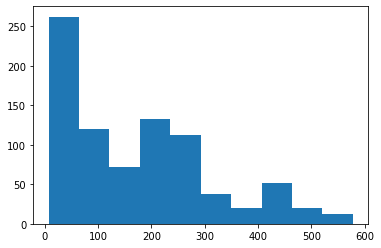

In [7]:
import matplotlib.pyplot as plt
plt.hist(ML_Data.ACC_ID)

In [8]:
# Add day of the week column
def ACC_Cat(number): 
    if (number < 100): return "Safe"
    elif (number <200): return "Carefull"
    elif (number < 350): return "Dangerous"
    else: return "Severely Dangerous"
# date = '07/10/2020'
# print(Datesplitter(date)[2]) 
ML_Data['TYPE'] = ML_Data['ACC_ID'].apply(ACC_Cat)
ML_Data

,CRASH_YEAR,CRASH_DAYWEEK,CRASH_TIME_HRS,ACC_ID,TYPE
0,15,Friday,0,29,Safe
1,15,Friday,1,21,Safe
2,15,Friday,2,22,Safe
3,15,Friday,3,9,Safe
4,15,Friday,4,14,Safe
...,...,...,...,...,...
835,19,Wednesday,19,144,Carefull
836,19,Wednesday,20,107,Carefull
837,19,Wednesday,21,87,Safe
838,19,Wednesday,22,56,Safe


In [9]:
maping_dict={'Safe':1, 'Severely Dangerous':4, 'Carefull':2,'Dangerous':3}
ML_Data['TYPE_NO']=ML_Data['TYPE'].map(maping_dict)
ML_Data

,CRASH_YEAR,CRASH_DAYWEEK,CRASH_TIME_HRS,ACC_ID,TYPE,TYPE_NO
0,15,Friday,0,29,Safe,1
1,15,Friday,1,21,Safe,1
2,15,Friday,2,22,Safe,1
3,15,Friday,3,9,Safe,1
4,15,Friday,4,14,Safe,1
...,...,...,...,...,...,...
835,19,Wednesday,19,144,Carefull,2
836,19,Wednesday,20,107,Carefull,2
837,19,Wednesday,21,87,Safe,1
838,19,Wednesday,22,56,Safe,1


In [10]:
maping_dict={'Friday':5, 'Monday':1, 'Saturday':6, 'Sunday':7, 'Thursday':4, 'Tuesday':2,'Wednesday':3}
ML_Data['CRASH_DAYWEEK']=ML_Data['CRASH_DAYWEEK'].map(maping_dict)
ML_Data

,CRASH_YEAR,CRASH_DAYWEEK,CRASH_TIME_HRS,ACC_ID,TYPE,TYPE_NO
0,15,5,0,29,Safe,1
1,15,5,1,21,Safe,1
2,15,5,2,22,Safe,1
3,15,5,3,9,Safe,1
4,15,5,4,14,Safe,1
...,...,...,...,...,...,...
835,19,3,19,144,Carefull,2
836,19,3,20,107,Carefull,2
837,19,3,21,87,Safe,1
838,19,3,22,56,Safe,1


In [11]:
X=ML_Data[['CRASH_TIME_HRS','CRASH_DAYWEEK','CRASH_YEAR']]
yl=ML_Data.TYPE_NO
y=ML_Data[['TYPE_NO']]
X

,CRASH_TIME_HRS,CRASH_DAYWEEK,CRASH_YEAR
0,0,5,15
1,1,5,15
2,2,5,15
3,3,5,15
4,4,5,15
...,...,...,...
835,19,3,19
836,20,3,19
837,21,3,19
838,22,3,19


In [12]:
print(X.shape, y.shape,yl.shape)

(840, 3) (840, 1) (840,)


In [13]:
type(yl)

pandas.core.series.Series

# LinearRegression

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X,y)

print(f"Training Data Score: {model.score(X, y)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")


Training Data Score: 0.08598969746265461
Testing Data Score: 0.12315664271633886


In [17]:
TEST=[[10,5,2019]]
LinearRegression_Predicted=model.predict(TEST)
LinearRegression_Predicted

array([[-52.79880538]])

# LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.4015873015873016
Testing Data Score: 0.3952380952380952


In [19]:
TEST=[[23,2,2020]]
LogisticRegression_Predicted=classifier.predict(TEST)
LogisticRegression_Predicted

array([2], dtype=int64)

# Support vector machine linear classifier

In [20]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.5952380952380952
Testing Data Score: 0.5952380952380952


In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10, 50],
              'gamma': [0.0001, 0.0005]}
grid = GridSearchCV(model, param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.516, total=   0.1s
[CV] C=10, gamma=0.0001 ..............................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[CV] .................. C=10, gamma=0.0001, score=0.587, total=   0.1s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.579, total=   0.1s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.611, total=   0.1s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.556, tot

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [10, 50], 'gamma': [0.0001, 0.0005]}, verbose=3)

In [22]:
# List the best parameters for this dataset
print(grid.best_params_)


{'C': 10, 'gamma': 0.0001}


In [23]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["1", "2","3","4"]))

              precision    recall  f1-score   support

           1       0.59      1.00      0.75        85
           2       0.00      0.00      0.00        32
           3       0.60      0.67      0.63        60
           4       0.00      0.00      0.00        33

    accuracy                           0.60       210
   macro avg       0.30      0.42      0.34       210
weighted avg       0.41      0.60      0.48       210



# Neural_networks

In [24]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
X_train_scaled.min()

-1.6799836704323536

In [26]:
from tensorflow.keras.utils import to_categorical
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
len(y_train_categorical)
y_train_categorical

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=3))
model.add(Dense(units=100, activation='relu', input_dim=1))
model.add(Dense(units=5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
Total params: 11,005
Trainable params: 11,005
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 630 samples
Epoch 1/100
630/630 - 0s - loss: 1.3949 - accuracy: 0.3794
Epoch 2/100
630/630 - 0s - loss: 1.1941 - accuracy: 0.4190
Epoch 3/100
630/630 - 0s - loss: 1.1032 - accuracy: 0.5540
Epoch 4/100
630/630 - 0s - loss: 1.0283 - accuracy: 0.6143
Epoch 5/100
630/630 - 0s - loss: 0.9599 - accuracy: 0.6508
Epoch 6/100
630/630 - 0s - loss: 0.9024 - accuracy: 0.6635
Epoch 7/100
630/630 - 0s - loss: 0.8464 - accuracy: 0.6698
Epoch 8/100
630/630 - 0s - loss: 0.8031 - accuracy: 0.6778
Epoch 9/100
630/630 - 0s - loss: 0.7594 - accuracy: 0.6857
Epoch 10/100
630/630 - 0s - loss: 0.7313 - accuracy: 0.6937
Epoch 11/100
630/630 - 0s - loss: 0.7025 - accuracy: 0.6937
Epoch 12/100
630/630 - 0s - loss: 0.6800 - accuracy: 0.7048
Epoch 13/100
630/630 - 0s - loss: 0.6615 - accuracy: 0.7254
Epoch 14/100
630/630 - 0s - loss: 0.6399 - accuracy: 0.7032
Epoch 15/100
630/630 - 0s - loss: 0.6238 - accuracy: 0.7365
Epoch 16/100
630/630 - 0s - loss: 0.6176 - accuracy: 0.7222
Epoch 17/100
630/630 - 0s - 

In [30]:
# Make predictions with the hypertuned model
predictions = model.predict_classes(X_test_scaled)
# Calculate classification report
print(y_test[:10])
print(predictions[:10])

     TYPE_NO
480        1
111        4
238        2
597        1
801        3
624        1
834        3
553        1
593        2
8          4
[1 4 2 1 3 1 3 1 2 3]


In [31]:
# Save the model
model.save("Accident_model_trained.h5")

In [32]:
# Load the model
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

Accident_model = load_model("Accident_model_trained.h5")

In [33]:
TEST=X_test[:10]

TEST_scaled = X_scaler.transform(TEST)

encoded_predictions = Accident_model.predict_classes(TEST)
prediction_labels =encoded_predictions
print(f"Predicted classes: {prediction_labels}")
print(y_test[:10])

Predicted classes: [2 1 1 1 1 2 1 1 1 1]
     TYPE_NO
480        1
111        4
238        2
597        1
801        3
624        1
834        3
553        1
593        2
8          4


In [34]:
# mayhem
# mad house
# chaotic


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(units=500, activation='relu', input_dim=3))
model1.add(Dense(units=500, activation='relu', input_dim=1))
model1.add(Dense(units=5, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               2000      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 2505      
Total params: 255,005
Trainable params: 255,005
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# Fit the model to the training data
model1.fit(
    X_train,
    y_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)

Train on 630 samples
Epoch 1/500
630/630 - 1s - loss: 1.1087 - accuracy: 0.5651
Epoch 2/500
630/630 - 0s - loss: 0.8509 - accuracy: 0.6492
Epoch 3/500
630/630 - 0s - loss: 0.7747 - accuracy: 0.6857
Epoch 4/500
630/630 - 0s - loss: 0.7320 - accuracy: 0.7000
Epoch 5/500
630/630 - 0s - loss: 0.7376 - accuracy: 0.7016
Epoch 6/500
630/630 - 0s - loss: 0.7216 - accuracy: 0.6794
Epoch 7/500
630/630 - 0s - loss: 0.6962 - accuracy: 0.7079
Epoch 8/500
630/630 - 0s - loss: 0.6726 - accuracy: 0.6873
Epoch 9/500
630/630 - 0s - loss: 0.7060 - accuracy: 0.6873
Epoch 10/500
630/630 - 0s - loss: 0.7037 - accuracy: 0.6635
Epoch 11/500
630/630 - 0s - loss: 0.7145 - accuracy: 0.6952
Epoch 12/500
630/630 - 0s - loss: 0.7690 - accuracy: 0.6476
Epoch 13/500
630/630 - 0s - loss: 0.7750 - accuracy: 0.6651
Epoch 14/500
630/630 - 0s - loss: 0.6923 - accuracy: 0.6937
Epoch 15/500
630/630 - 0s - loss: 0.6586 - accuracy: 0.7159
Epoch 16/500
630/630 - 0s - loss: 0.6914 - accuracy: 0.7238
Epoch 17/500
630/630 - 0s - 

In [38]:
# Save the model
model.save("N_model_trained.h5")

# Loading the Model

In [39]:
# Load the model
from tensorflow.keras.models import load_model
N_model = load_model("N_model_trained.h5")

TEST=[[14,5,20]]
# [14,5,15]vs[14,5,19]

predictions = N_model.predict_classes(TEST)
print(f"Predicted classes: {predictions[0]}")


Predicted classes: 1


In [43]:
Data_json=[]
Y=20
D=5
H=15
Accident_model = load_model("N_model_trained.h5")
for i in range (-2 ,3):
    y=int(Y)
    d=int(D)
    h=int(H)
    Data_predictions={}
    Time=[[h+i,d,y]]
    Data_predictions["Day_time"]={}
    Data_predictions["Day_time"]["H"]=h+i
    Data_predictions["Day_time"]["D"]=d
    Data_predictions["Day_time"]["Y"]=y
    Data_predictions["predictions"] = Accident_model.predict_classes(Time)[0]
    Data_json.append(Data_predictions)
Data_json

[{'Day_time': {'H': 13, 'D': 5, 'Y': 20}, 'predictions': 1},
 {'Day_time': {'H': 14, 'D': 5, 'Y': 20}, 'predictions': 1},
 {'Day_time': {'H': 15, 'D': 5, 'Y': 20}, 'predictions': 1},
 {'Day_time': {'H': 16, 'D': 5, 'Y': 20}, 'predictions': 1},
 {'Day_time': {'H': 17, 'D': 5, 'Y': 20}, 'predictions': 1}]

In [44]:
    Data_json

[{'Day_time': {'H': 13, 'D': 5, 'Y': 20}, 'predictions': 1},
 {'Day_time': {'H': 14, 'D': 5, 'Y': 20}, 'predictions': 1},
 {'Day_time': {'H': 15, 'D': 5, 'Y': 20}, 'predictions': 1},
 {'Day_time': {'H': 16, 'D': 5, 'Y': 20}, 'predictions': 1},
 {'Day_time': {'H': 17, 'D': 5, 'Y': 20}, 'predictions': 1}]

In [45]:
   Data_json[0]["Day_time"]

{'H': 13, 'D': 5, 'Y': 20}


# BREAK TIME ! COMMING BACK :12:30